# Exploring Data

## Determining available data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import glob
files = glob.glob('zippedData/*')
files

['zippedData/imdb.title.crew.csv.gz',
 'zippedData/tmdb.movies.csv.gz',
 'zippedData/imdb.title.akas.csv.gz',
 'zippedData/imdb.title.ratings.csv.gz',
 'zippedData/imdb.name.basics.csv.gz',
 'zippedData/rt.reviews.tsv.gz',
 'zippedData/imdb.title.basics.csv.gz',
 'zippedData/rt.movie_info.tsv.gz',
 'zippedData/tn.movie_budgets.csv.gz',
 'zippedData/bom.movie_gross.csv.gz',
 'zippedData/imdb.title.principals.csv.gz']

## Organizing Files

In [2]:
#Isolating the primary key and creating a list of the other columns within each file. 
#Then, using these lists to create a dataframe for easy reference.

primary_keys = []
other_columns = []

for file in files:
    try:
        primary_keys.append(pd.read_csv(file).columns[0])
        other_columns.append(list(pd.read_csv(file).columns[1:]))
    except:
        primary_keys.append(pd.read_csv(file,sep='\t',encoding='latin1').columns[0])
        other_columns.append(list(pd.read_csv(file,sep='\t',encoding='latin1').columns[1:]))

In [3]:
#Creating a dictionary from the above lists

data = {'File':files,'Primary Key':primary_keys,'Other Columns':other_columns}

# Creating the dataframe and ensuring we can view all values in the "Other Columns"

files_df = pd.DataFrame(data).sort_values('File')
pd.set_option('display.max_colwidth',1000)
files_df

,File,Primary Key,Other Columns
9,zippedData/bom.movie_gross.csv.gz,title,"[studio, domestic_gross, foreign_gross, year]"
4,zippedData/imdb.name.basics.csv.gz,nconst,"[primary_name, birth_year, death_year, primary_profession, known_for_titles]"
2,zippedData/imdb.title.akas.csv.gz,title_id,"[ordering, title, region, language, types, attributes, is_original_title]"
6,zippedData/imdb.title.basics.csv.gz,tconst,"[primary_title, original_title, start_year, runtime_minutes, genres]"
0,zippedData/imdb.title.crew.csv.gz,tconst,"[directors, writers]"
10,zippedData/imdb.title.principals.csv.gz,tconst,"[ordering, nconst, category, job, characters]"
3,zippedData/imdb.title.ratings.csv.gz,tconst,"[averagerating, numvotes]"
7,zippedData/rt.movie_info.tsv.gz,id,"[synopsis, rating, genre, director, writer, theater_date, dvd_date, currency, box_office, runtime, studio]"
5,zippedData/rt.reviews.tsv.gz,id,"[review, rating, fresh, critic, top_critic, publisher, date]"
1,zippedData/tmdb.movies.csv.gz,Unnamed: 0,"[genre_ids, id, original_language, original_title, popularity, release_date, title, vote_average, vote_count]"


## File Summary

In [4]:
#Input notes on which tables we're moving forward with

In [5]:
files_df

,File,Primary Key,Other Columns
9,zippedData/bom.movie_gross.csv.gz,title,"[studio, domestic_gross, foreign_gross, year]"
4,zippedData/imdb.name.basics.csv.gz,nconst,"[primary_name, birth_year, death_year, primary_profession, known_for_titles]"
2,zippedData/imdb.title.akas.csv.gz,title_id,"[ordering, title, region, language, types, attributes, is_original_title]"
6,zippedData/imdb.title.basics.csv.gz,tconst,"[primary_title, original_title, start_year, runtime_minutes, genres]"
0,zippedData/imdb.title.crew.csv.gz,tconst,"[directors, writers]"
10,zippedData/imdb.title.principals.csv.gz,tconst,"[ordering, nconst, category, job, characters]"
3,zippedData/imdb.title.ratings.csv.gz,tconst,"[averagerating, numvotes]"
7,zippedData/rt.movie_info.tsv.gz,id,"[synopsis, rating, genre, director, writer, theater_date, dvd_date, currency, box_office, runtime, studio]"
5,zippedData/rt.reviews.tsv.gz,id,"[review, rating, fresh, critic, top_critic, publisher, date]"
1,zippedData/tmdb.movies.csv.gz,Unnamed: 0,"[genre_ids, id, original_language, original_title, popularity, release_date, title, vote_average, vote_count]"


# Is this a smart investment? What's the average profit for a movie? How has this been trending? What is the movie landscape?

In [6]:
#re-word these questions^^^

## Formatting/Overview

In [190]:
#Converting money strings to integers, replacing dollar signs

Money = pd.read_csv(files[8])
Money['production_budget'] = Money['production_budget'].str.replace('$','').str.replace(',','').astype(int)
Money['domestic_gross'] = Money['domestic_gross'].str.replace('$','').str.replace(',','').astype(int)
Money['worldwide_gross'] = Money['worldwide_gross'].str.replace('$','').str.replace(',','').astype(int)
Money.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [191]:
#Adding profit column

Money['total_profit'] = Money['worldwide_gross'] - Money['production_budget']
Money.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [192]:
#Checking for any null values

Money.isna().any()

id                   False
release_date         False
movie                False
production_budget    False
domestic_gross       False
worldwide_gross      False
total_profit         False
dtype: bool

In [193]:
#Checking for any missing data

Money.loc[(Money['worldwide_gross'] == 0)]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit
194,95,"Dec 31, 2020",Moonfall,150000000,0,0,-150000000
479,80,"Dec 13, 2017",Bright,90000000,0,0,-90000000
480,81,"Dec 31, 2019",Army of the Dead,90000000,0,0,-90000000
535,36,"Feb 21, 2020",Call of the Wild,82000000,0,0,-82000000
670,71,"Aug 30, 2019",PLAYMOBIL,75000000,0,0,-75000000
...,...,...,...,...,...,...,...
5761,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0,-15000
5764,65,"Dec 31, 2007",Tin Can Man,12000,0,0,-12000
5771,72,"May 19, 2015",Family Motocross,10000,0,0,-10000
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000


In [194]:
#Excluding movies where grossing data is not yet available (6% of all data). Creating new dataframe.

Grossing_movies = Money.loc[(Money['worldwide_gross'] > 0)]
Grossing_movies.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [195]:
# Adding year column

Grossing_movies['release_year'] = pd.DatetimeIndex(Grossing_movies['release_date']).year
Grossing_movies.head()

/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017


In [196]:
#Average profit for all time

'${:,.2f}'.format(Grossing_movies['total_profit'].mean())

'$64,379,990.03'

In [197]:
#Timeframe of this dataset

print(Grossing_movies['release_year'].min())
print(Grossing_movies['release_year'].max())

1915
2019


## Profit by Decade

In [198]:
# Creating decades column for grouping

Grossing_movies['decade'] = (10 * (Grossing_movies['release_year'] // 10))
Grossing_movies.head()

/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,2009,2000
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015,2010
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,2010


In [199]:
Grossing_movies.sort_values('total_profit',ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,2009,2000
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,1997,1990
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,2010
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,2010
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,2015,2010
...,...,...,...,...,...,...,...,...,...
404,5,"Aug 16, 2002",The Adventures of Pluto Nash,100000000,4411102,7094995,-92905005,2002,2000
352,53,"Apr 27, 2001",Town & Country,105000000,6712451,10364769,-94635231,2001,2000
341,42,"Jun 14, 2019",Men in Black: International,110000000,3100000,3100000,-106900000,2019,2010
193,94,"Mar 11, 2011",Mars Needs Moms,150000000,21392758,39549758,-110450242,2011,2010


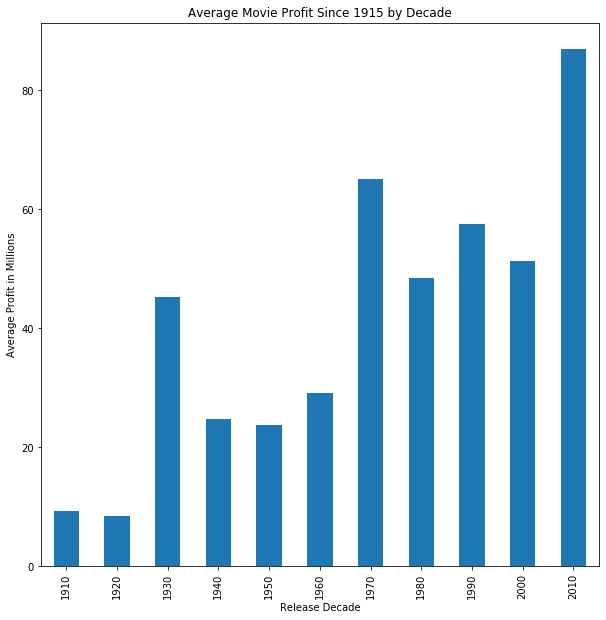

In [200]:
#Plotting average profit over time

Profit_over_time = (Grossing_movies.groupby(['decade'])['total_profit'].mean())/1000000
Profit_over_time

Profit_over_time.plot(kind='bar',figsize=(10,10))
plt.xlabel('Release Decade')
plt.ylabel('Average Profit in Millions')
plt.title('Average Movie Profit Since 1915 by Decade')
plt.ticklabel_format(style='plain', axis='y') #prevent scientific notation (no longer necessary since we're dividing the mean by millions)

## Profit in the Last Decade

In [201]:
#Creating new dataframe 

Last_decade_gross = Grossing_movies.loc[Grossing_movies['decade']==2010]
Last_decade_gross.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015,2010
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,2010
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,2010


Text(0.5, 1.0, 'Average Movie Profit Since 2010 by Year')

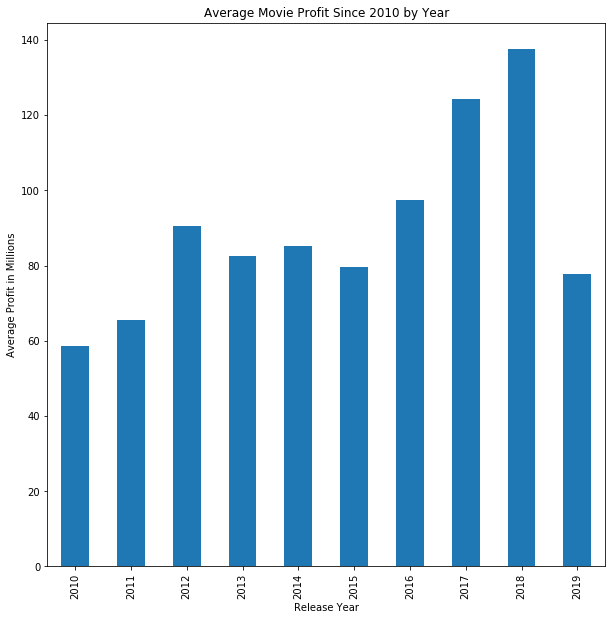

In [202]:
Last_decade_gross_group = (Last_decade_gross.groupby(['release_year'])['total_profit'].mean())/1000000
Last_decade_gross_group.plot(kind='bar',figsize=(10,10))
plt.xlabel('Release Year')
plt.ylabel('Average Profit in Millions')
plt.title('Average Movie Profit Since 2010 by Year')

In [203]:
Last_decade_gross['release_year'].value_counts()

2010    258
2015    242
2011    241
2013    212
2014    207
2012    207
2016    204
2017    162
2018    140
2019     49
Name: release_year, dtype: int64

Potential Reasons for decrease in 2019:

- Limited sample size, especially compared to the other years
- "Cord cutters" are a growing group of consumers, giving rise to more direct to streaming movies and people skipping the box office. This data does not include data around views/profits from these platforms (i.e, Netflix,Hulu,Amazon Prime Video, etc)
- Next steps 

# TMDB Simple

In [250]:
pip install tmdbsimple

Note: you may need to restart the kernel to use updated packages.


In [251]:
import tmdbsimple as tmdb
tmdb.API_KEY = 'dad396248d0ec2a32944e1a50e0e4781'

## Mapping Names to IDs in TMDB

In [481]:
Grossing_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,tmdb_id,Genres,Ratings
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,2009,2000,19995,"[Action, Adventure, Fantasy, Science Fiction]",['PG-13']
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010,1865,"[Adventure, Action, Fantasy]",['PG-13']
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010,320288,"[Science Fiction, Action, Adventure]",['PG-13']
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015,2010,99861,"[Action, Adventure, Science Fiction]",['PG-13']
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,2010,19995,"[Action, Adventure, Fantasy, Science Fiction]",['PG-13']
...,...,...,...,...,...,...,...,...,...,...,...,...
5364,75,"Oct 8, 2004",Primer,7000,424760,841926,834926,2004,2000,14337,"[Science Fiction, Drama, Thriller]",['PG-13']
5365,76,"May 26, 2006",Cavite,7000,70071,71644,64644,2006,2000,67238,[Thriller],['Not Rated']
5366,79,"Apr 2, 1999",Following,6000,48482,240495,234495,1999,1990,11660,"[Drama, Thriller]",['R']
5367,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662,2005,2000,292902,[Documentary],['Not Rated']


In [24]:
search = tmdb.Search()
tmdb_ids = []
errors = []
items = 0


for movie in Grossing_movies['movie']:
    items += 1
    print(items)
    try:
        response = search.movie(query = movie)
        tmdb_ids.append(search.results[0]['id'])
    except: 
        tmdb_ids.append('Missing')
        errors.append(movie)
    if items == len(Grossing_movies['movie']):
        break

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061


3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701


5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340


In [25]:
len(tmdb_ids)

5415

In [125]:
len(errors)

150

In [124]:
errors

['Star Wars Ep. VIII: The Last Jedi',
 'Star Wars Ep. VII: The Force Awakens',
 'Pirates of the Caribbean: At Worldâ\x80\x99s End',
 'Pirates of the Caribbean: Dead Manâ\x80\x99s Chest',
 'Disneyâ\x80\x99s A Christmas Carol',
 'PokÃ©mon: Detective Pikachu',
 'Harry Potter and the Deathly Hallows: Part II',
 'Harry Potter and the Sorcererâ\x80\x99s Stone',
 'Assassinâ\x80\x99s Creed',
 'Star Wars Ep. I: The Phantom Menace',
 'Star Wars Ep. III: Revenge of the Sith',
 'Star Wars Ep. II: Attack of the Clones',
 'The Huntsman: Winterâ\x80\x99s War',
 'AstÃ©rix aux Jeux Olympiques',
 'Miss Peregrineâ\x80\x99s Home for Peculiar Children',
 'Jin lÃ\xadng shÃ\xad san chai',
 'Spider-Man: Into The Spider-Verse 3D',
 'Itâ\x80\x99s Complicated',
 'Fantasia 2000 (Theatrical Release)',
 'DÃ©jÃ Vu',
 'AstÃ©rix et ObÃ©lix: Au service de Sa MajestÃ©',
 'Dr. Seussâ\x80\x99 The Grinch',
 'Daddyâ\x80\x99s Home 2',
 'Legends of Oz: Dorothyâ\x80\x99s Return',
 "Doctor Seuss' The Lorax",
 'Peteâ\x80\x99s Dr

In [28]:
replacements = [('Ã©','é'),
                ("\x80\x80\x99","'"),
                ("â\x80\x99","'"),
                 ('Ãª','ê'),
                 ('â\x80¦','...'),
                 ('â\x80\x99'','''),
                 ('Ã¡','á'),
                 ('Ã¨','è'),
                 ('Ã','à'),
                 ('Âº','º'),
                 ('\\',"'"),
                 ('à¸','ø'),
                 ('à§','ç'),
                 ('Ep.','Episode'),
                 ('à³','ó'),
                 ('à¹','ù'),
                 ('2Â½','2½'),
                 ('à¤','ä'),
                 ('à¬','ì'),
                 ('à»','û'),
                 ('à\\x','í'),
                 ('à«','ë'),
                 ('â\x80\x93','-'),
                 ('à¥','å')]

In [29]:
def clean_movie(data):
        for a in replacements:
            data = data.replace(a[0], a[1])
        return data

In [30]:
clean_movie(errors[3])

"Pirates of the Caribbean: Dead Man's Chest"

In [31]:
errors_replacements = []

for movie in errors:
    errors_replacements.append(clean_movie(movie))

In [32]:
len(errors_replacements)

150

In [126]:
errors_replacements

['Star Wars Episode VIII: The Last Jedi',
 'Star Wars Episode VII: The Force Awakens',
 "Pirates of the Caribbean: At World's End",
 "Pirates of the Caribbean: Dead Man's Chest",
 "Disney's A Christmas Carol",
 'Pokémon: Detective Pikachu',
 'Harry Potter and the Deathly Hallows: Part II',
 "Harry Potter and the Sorcerer's Stone",
 "Assassin's Creed",
 'Star Wars Episode I: The Phantom Menace',
 'Star Wars Episode III: Revenge of the Sith',
 'Star Wars Episode II: Attack of the Clones',
 "The Huntsman: Winter's War",
 'Astérix aux Jeux Olympiques',
 "Miss Peregrine's Home for Peculiar Children",
 'Jin là\xadng shà\xad san chai',
 'Spider-Man: Into The Spider-Verse 3D',
 "It's Complicated",
 'Fantasia 2000 (Theatrical Release)',
 'Déjà Vu',
 'Astérix et Obélix: Au service de Sa Majesté',
 "Dr. Seuss' The Grinch",
 "Daddy's Home 2",
 "Legends of Oz: Dorothy's Return",
 "Doctor Seuss' The Lorax",
 "Pete's Dragon",
 "A Dog's Way Home",
 "Winter's Tale",
 "Mr. Poppers's Penguins",
 'Un long

In [127]:
errors_dict = {'original':errors , 'fixed':errors_replacements}
errors_df = pd.DataFrame(errors_dict)
errors_df

,original,fixed
0,Star Wars Ep. VIII: The Last Jedi,Star Wars Episode VIII: The Last Jedi
1,Star Wars Ep. VII: The Force Awakens,Star Wars Episode VII: The Force Awakens
2,Pirates of the Caribbean: At Worldâs End,Pirates of the Caribbean: At World's End
3,Pirates of the Caribbean: Dead Manâs Chest,Pirates of the Caribbean: Dead Man's Chest
4,Disneyâs A Christmas Carol,Disney's A Christmas Carol
...,...,...
145,The Business of Fancy Dancing,The Business of Fancy Dancing
146,Sweet Sweetback's Baad Asssss Song,Sweet Sweetback's Baad Asssss Song
147,Antarctic Edge: 70Âº South,Antarctic Edge: 70º South
148,Keeping it Real: The Adventures of Greg Walloch,Keeping it Real: The Adventures of Greg Walloch


In [471]:
errors_df[errors_df['original'].str.contains('Grinch')]

,original,fixed,fixed_ids
21,Dr. Seussâ The Grinch,Dr. Seuss' The Grinch,54245


In [128]:
search = tmdb.Search()
fixed_ids = []
errors2 = []
items = 0


for movie in errors_df['fixed']:
    items += 1
    print(items)
    try:
        response = search.movie(query = movie)
        fixed_ids.append(search.results[0]['id'])
    except: 
        fixed_ids.append('Missing')
        errors2.append(movie)
    if items == len(errors_df['fixed']):
        break

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150


In [129]:
len(fixed_ids)

150

In [130]:
errors_df['fixed_ids'] = fixed_ids

In [131]:
errors_df['original'] == 'Avatar'

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: original, Length: 150, dtype: bool

In [132]:
#Reduced Missing values to 41. Dropping these (<1% of Grossing_Movies table)

errors_df[errors_df['fixed_ids']=='Missing'].shape

(41, 3)

In [133]:
errors_df[errors_df['fixed_ids']!='Missing'].shape

(109, 3)

In [134]:
no_missing = errors_df[errors_df['fixed_ids']!='Missing']
no_missing = no_missing.reset_index(drop=True)
no_missing

,original,fixed,fixed_ids
0,Star Wars Ep. VIII: The Last Jedi,Star Wars Episode VIII: The Last Jedi,181808
1,Star Wars Ep. VII: The Force Awakens,Star Wars Episode VII: The Force Awakens,140607
2,Pirates of the Caribbean: At Worldâs End,Pirates of the Caribbean: At World's End,285
3,Pirates of the Caribbean: Dead Manâs Chest,Pirates of the Caribbean: Dead Man's Chest,58
4,Disneyâs A Christmas Carol,Disney's A Christmas Carol,17979
...,...,...,...
104,Godâs Not Dead,God's Not Dead,249660
105,The Helixâ¦Loaded,The Helix...Loaded,43630
106,DÃ¸d snÃ¸,Død snø,14451
107,La mariÃ©e Ã©tait en noir,La mariée était en noir,4191


In [135]:
len(errors2)

41

In [205]:
Grossing_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,2009,2000
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015,2010
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,2010
...,...,...,...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,7000,70071,71644,64644,2006,2000
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900,-6100,2004,2000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,234495,1999,1990
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662,2005,2000


In [137]:
# #replace items from errors into grossing 


# Grossing_movies.loc[Grossing_movies.movie.isin(errors_df.original), ['tmbd_ids']] = errors_df['fixed_ids']
# Grossing_movies[Grossing_movies['tmbd_ids']=='Missing'].shape


In [206]:
keys = Grossing_movies['movie']
values = tmdb_ids
movie_id_dict = dict(zip(keys, values))
movie_id_dict

{'Avatar': 19995,
 'Pirates of the Caribbean: On Stranger Tides': 1865,
 'Dark Phoenix': 320288,
 'Avengers: Age of Ultron': 99861,
 'Star Wars Ep. VIII: The Last Jedi': 'Missing',
 'Star Wars Ep. VII: The Force Awakens': 'Missing',
 'Avengers: Infinity War': 299536,
 'Pirates of the Caribbean: At Worldâ\x80\x99s End': 'Missing',
 'Justice League': 141052,
 'Spectre': 206647,
 'The Dark Knight Rises': 49026,
 'Solo: A Star Wars Story': 348350,
 'The Lone Ranger': 57201,
 'John Carter': 49529,
 'Tangled': 38757,
 'Spider-Man 3': 559,
 'Captain America: Civil War': 271110,
 'Batman v Superman: Dawn of Justice': 209112,
 'The Hobbit: An Unexpected Journey': 49051,
 'Harry Potter and the Half-Blood Prince': 767,
 'The Hobbit: The Desolation of Smaug': 57158,
 'The Hobbit: The Battle of the Five Armies': 122917,
 'The Fate of the Furious': 337339,
 'Superman Returns': 1452,
 'Pirates of the Caribbean: Dead Men Tell No Tales': 166426,
 'Quantum of Solace': 10764,
 'The Avengers': 24428,
 'Pi

In [207]:
fixed_keys = no_missing['original']
fixed_values = no_missing['fixed_ids']
fixes_movie_id_dict = dict(zip(fixed_keys, values))
fixes_movie_id_dict

{'Star Wars Ep. VIII: The Last Jedi': 19995,
 'Star Wars Ep. VII: The Force Awakens': 1865,
 'Pirates of the Caribbean: At Worldâ\x80\x99s End': 320288,
 'Pirates of the Caribbean: Dead Manâ\x80\x99s Chest': 99861,
 'Disneyâ\x80\x99s A Christmas Carol': 'Missing',
 'PokÃ©mon: Detective Pikachu': 'Missing',
 'Harry Potter and the Sorcererâ\x80\x99s Stone': 299536,
 'Assassinâ\x80\x99s Creed': 'Missing',
 'Star Wars Ep. I: The Phantom Menace': 141052,
 'Star Wars Ep. III: Revenge of the Sith': 206647,
 'Star Wars Ep. II: Attack of the Clones': 49026,
 'The Huntsman: Winterâ\x80\x99s War': 348350,
 'AstÃ©rix aux Jeux Olympiques': 57201,
 'Miss Peregrineâ\x80\x99s Home for Peculiar Children': 49529,
 'Itâ\x80\x99s Complicated': 38757,
 'DÃ©jÃ Vu': 559,
 'AstÃ©rix et ObÃ©lix: Au service de Sa MajestÃ©': 271110,
 'Dr. Seussâ\x80\x99 The Grinch': 209112,
 'Daddyâ\x80\x99s Home 2': 49051,
 'Legends of Oz: Dorothyâ\x80\x99s Return': 767,
 'Peteâ\x80\x99s Dragon': 155,
 'A Dogâ\x80\x99s Way Home

In [208]:
print(len(fixes_movie_id_dict))
print(len(movie_id_dict))
print(len(fixed_keys))
print(len(fixed_values))

108
5339
109
109


In [479]:
Grossing_movies['movie'][Grossing_movies['movie'].value_counts()>1]

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [209]:
108 + 5339

5447

In [210]:
fixes_movie_id_dict.items()
movie_id_dict['PokÃ©mon: Detective Pikachu']

'Missing'

In [211]:
Grossing_movies[Grossing_movies['movie'] == 'Godzilla']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade
140,41,"May 16, 2014",Godzilla,160000000,200676069,529076069,369076069,2014,2010
273,74,"May 19, 1998",Godzilla,125000000,136314294,376000000,251000000,1998,1990


In [212]:
Grossing_movies[Grossing_movies['movie'].duplicated()]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade
273,74,"May 19, 1998",Godzilla,125000000,136314294,376000000,251000000,1998,1990
408,9,"Nov 21, 2018",Robin Hood,99000000,30824628,84747441,-14252559,2018,2010
484,85,"Jul 8, 2005",Fantastic Four,87500000,154696080,333132750,245632750,2005,2000
543,44,"May 7, 1999",The Mummy,80000000,155385488,416385488,336385488,1999,1990
707,8,"Jun 13, 1997",Hercules,70000000,99112101,250700000,180700000,1997,1990
...,...,...,...,...,...,...,...,...,...
5668,69,"Nov 16, 1942",Cat People,134000,4000000,8000000,7866000,1942,1940
5676,77,"Oct 1, 1968",Night of the Living Dead,114000,12087064,30087064,29973064,1968,1960
5677,78,"Feb 8, 1915",The Birth of a Nation,110000,10000000,11000000,10890000,1915,1910
5699,100,"Aug 30, 1972",The Last House on the Left,87000,3100000,3100000,3013000,1972,1970


In [213]:
for movie, ids in movie_id_dict.items():
    if ids == 'Missing':
        try:
            movie_id_dict[movie] = fixes_movie_id_dict[movie]
        except: 
            pass

In [214]:
K = 'Missing'

res = 0
for key in movie_id_dict: 
    if movie_id_dict[key] == K: 
        res = res + 1
res

46

In [215]:
len(movie_id_dict)

5339

In [216]:
Grossing_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,2009,2000
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015,2010
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,2010
...,...,...,...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,7000,70071,71644,64644,2006,2000
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900,-6100,2004,2000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,234495,1999,1990
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662,2005,2000


In [217]:
Grossing_movies['tmdb_id'] = Grossing_movies['movie'].map(movie_id_dict)

/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [218]:
#dropping movies where we couldn't find the IDs. 46/5415 <1% of data

Grossing_movies = (Grossing_movies[Grossing_movies['tmdb_id'] != 'Missing'])
Grossing_movies = Grossing_movies.reset_index(drop=True)
Grossing_movies

# no_missing = errors_df[errors_df['fixed_ids']!='Missing']
# no_missing = no_missing.reset_index(drop=True)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,tmdb_id
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,2009,2000,19995
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010,1865
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010,320288
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015,2010,99861
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,2010,19995
...,...,...,...,...,...,...,...,...,...,...
5364,75,"Oct 8, 2004",Primer,7000,424760,841926,834926,2004,2000,14337
5365,76,"May 26, 2006",Cavite,7000,70071,71644,64644,2006,2000,67238
5366,79,"Apr 2, 1999",Following,6000,48482,240495,234495,1999,1990,11660
5367,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662,2005,2000,292902


## Using IDs to find Genres and Ratings

In [280]:
count = 0

genre_names = []
ratings_list = []

for m in Grossing_movies['tmdb_id']:
    
    count += 1
    print(count)
    
    #genres
    movie_genre = []
    movie = tmdb.Movies(m)
    response = movie.info()
    response = response['genres']
    for g in response:
        movie_genre.append(g['name'])
    genre_names.append(movie_genre)
    
    #ratings
    grouped_ratings = []
    response = movie.releases()
    movie.countries
    for c in movie.countries:
        if c['iso_3166_1'] == 'US':
            grouped_ratings.append((c['certification']))
    unique = set(grouped_ratings)
    unique = [x for x in unique if len(x.strip()) > 0]
    if len(unique) == 0:
        unique.append('Not Rated')
    ratings_list.append(unique)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699


5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338


In [287]:
print(len(genre_names))

unique_genre_names = [] 
for x in genre_names:
    if x not in unique_genre_names: 
            unique_genre_names.append(x)
unique_genre_names

5369


[['Action', 'Adventure', 'Fantasy', 'Science Fiction'],
 ['Adventure', 'Action', 'Fantasy'],
 ['Science Fiction', 'Action', 'Adventure'],
 ['Action', 'Adventure', 'Science Fiction'],
 ['Adventure', 'Action', 'Science Fiction'],
 ['Action', 'Adventure', 'Thriller'],
 ['Action', 'Crime', 'Drama', 'Thriller'],
 ['Adventure', 'Science Fiction'],
 ['Action', 'Adventure', 'Western'],
 ['Animation', 'Family'],
 ['Fantasy', 'Action', 'Adventure'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Adventure', 'Fantasy', 'Action'],
 ['Adventure', 'Fantasy'],
 ['Action', 'Crime', 'Thriller'],
 ['Adventure', 'Action', 'Fantasy', 'Comedy'],
 ['Adventure', 'Action', 'Thriller', 'Crime'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Thriller', 'Action', 'Adventure', 'Science Fiction'],
 ['Action', 'Science Fiction', 'Thriller', 'Adventure'],
 ['Action', 'Adventure', 'Science Fiction', 'Thriller'],
 ['Action', 'Comedy', 'Science Fiction'],
 ['Adventure', 'Action', 'Science Fiction', 'Thriller'],
 ['Action', 'Adventu

In [289]:
print(len(ratings_list))

unique_ratings = [] 
for x in ratings_list:
    if x not in unique_ratings: 
            unique_ratings.append(x)
unique_ratings

5369


[['PG-13'],
 ['PG'],
 ['R', 'PG-13'],
 ['G'],
 ['R'],
 ['NR'],
 ['Not Rated'],
 ['R', 'NR'],
 ['NC-17'],
 ['PG', 'NR'],
 ['PG', 'PG-13'],
 ['PG-13', 'NR']]

In [286]:
genre_names

[['Action', 'Adventure', 'Fantasy', 'Science Fiction'],
 ['Adventure', 'Action', 'Fantasy'],
 ['Science Fiction', 'Action', 'Adventure'],
 ['Action', 'Adventure', 'Science Fiction'],
 ['Action', 'Adventure', 'Fantasy', 'Science Fiction'],
 ['Adventure', 'Action', 'Fantasy'],
 ['Adventure', 'Action', 'Science Fiction'],
 ['Science Fiction', 'Action', 'Adventure'],
 ['Action', 'Adventure', 'Fantasy', 'Science Fiction'],
 ['Action', 'Adventure', 'Thriller'],
 ['Action', 'Crime', 'Drama', 'Thriller'],
 ['Adventure', 'Science Fiction'],
 ['Action', 'Adventure', 'Western'],
 ['Action', 'Adventure', 'Science Fiction'],
 ['Animation', 'Family'],
 ['Fantasy', 'Action', 'Adventure'],
 ['Adventure', 'Action', 'Science Fiction'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Adventure', 'Fantasy', 'Action'],
 ['Adventure', 'Fantasy'],
 ['Adventure', 'Fantasy', 'Action'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Crime', 'Thriller'],
 ['Science Fiction', 'Action', 'Adventure'],
 ['Adventure', 'Ac

In [290]:
Grossing_movies['Genres'] = genre_names
Grossing_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,tmdb_id,Genres
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,2009,2000,19995,"[Action, Adventure, Fantasy, Science Fiction]"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010,1865,"[Adventure, Action, Fantasy]"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010,320288,"[Science Fiction, Action, Adventure]"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015,2010,99861,"[Action, Adventure, Science Fiction]"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,2010,19995,"[Action, Adventure, Fantasy, Science Fiction]"
...,...,...,...,...,...,...,...,...,...,...,...
5364,75,"Oct 8, 2004",Primer,7000,424760,841926,834926,2004,2000,14337,"[Science Fiction, Drama, Thriller]"
5365,76,"May 26, 2006",Cavite,7000,70071,71644,64644,2006,2000,67238,[Thriller]
5366,79,"Apr 2, 1999",Following,6000,48482,240495,234495,1999,1990,11660,"[Drama, Thriller]"
5367,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662,2005,2000,292902,[Documentary]


In [454]:
#Converting values from lists to strings

ratings_list
new_ratings_list = []
for rating in ratings_list:
    new_ratings_list.append(str(rating))

In [455]:
type(new_ratings_list[0])

str

In [456]:
unique_ratings = [] 
for x in new_ratings_list:
    if x not in unique_ratings: 
            unique_ratings.append(x)
unique_ratings

["['PG-13']",
 "['PG']",
 "['R', 'PG-13']",
 "['G']",
 "['R']",
 "['NR']",
 "['Not Rated']",
 "['R', 'NR']",
 "['NC-17']",
 "['PG', 'NR']",
 "['PG', 'PG-13']",
 "['PG-13', 'NR']"]

In [457]:
Grossing_movies['Ratings'] = new_ratings_list
Grossing_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,tmdb_id,Genres,Ratings
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,2009,2000,19995,"[Action, Adventure, Fantasy, Science Fiction]",['PG-13']
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010,1865,"[Adventure, Action, Fantasy]",['PG-13']
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010,320288,"[Science Fiction, Action, Adventure]",['PG-13']
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015,2010,99861,"[Action, Adventure, Science Fiction]",['PG-13']
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,2010,19995,"[Action, Adventure, Fantasy, Science Fiction]",['PG-13']
...,...,...,...,...,...,...,...,...,...,...,...,...
5364,75,"Oct 8, 2004",Primer,7000,424760,841926,834926,2004,2000,14337,"[Science Fiction, Drama, Thriller]",['PG-13']
5365,76,"May 26, 2006",Cavite,7000,70071,71644,64644,2006,2000,67238,[Thriller],['Not Rated']
5366,79,"Apr 2, 1999",Following,6000,48482,240495,234495,1999,1990,11660,"[Drama, Thriller]",['R']
5367,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662,2005,2000,292902,[Documentary],['Not Rated']


In [466]:
list(Grossing_movies['Ratings'].unique())

["['PG-13']",
 "['PG']",
 "['R', 'PG-13']",
 "['G']",
 "['R']",
 "['NR']",
 "['Not Rated']",
 "['NC-17']",
 "['PG', 'PG-13']"]

In [463]:
Grossing_movies['Ratings'][Grossing_movies['Ratings'].str.contains(", 'NR']")].unique()

array(["['R', 'NR']", "['PG', 'NR']", "['PG-13', 'NR']"], dtype=object)

In [464]:
#Replacing all entries with two ratings where one of them is NR with just the original rating

Grossing_movies['Ratings'][Grossing_movies['Ratings'] == "['PG-13', 'NR']"] = "['PG-13']"
Grossing_movies['Ratings'][Grossing_movies['Ratings'] == "['R', 'NR']"] = "['PG-13']"
Grossing_movies['Ratings'][Grossing_movies['Ratings'] == "['PG', 'NR']"] = "['PG']"

/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 

In [467]:
list(Grossing_movies['Ratings'].unique())

["['PG-13']",
 "['PG']",
 "['R', 'PG-13']",
 "['G']",
 "['R']",
 "['NR']",
 "['Not Rated']",
 "['NC-17']",
 "['PG', 'PG-13']"]

In [469]:
#Manually re-assinging this based on tmdb.

#https://www.themoviedb.org/movie/209112-batman-v-superman-dawn-of-justice = PG-13
#https://www.themoviedb.org/movie/383498-deadpool-2?language=en-US = R
#https://www.themoviedb.org/movie/383498-deadpool-2?language=en-US = PG


Grossing_movies[Grossing_movies['Ratings'].str.contains(",")]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,tmdb_id,Genres,Ratings
17,18,"Mar 25, 2016",Batman v Superman: Dawn of Justice,250000000,330360194,867500281,617500281,2016,2010,209112,"[Action, Adventure, Fantasy]","['R', 'PG-13']"
309,15,"May 18, 2018",Deadpool 2,110000000,324591735,786680557,676680557,2018,2010,383498,"[Action, Comedy, Adventure]","['R', 'PG-13']"
616,28,"Nov 9, 2018",Dr. Seussâ The Grinch,75000000,270620950,511002426,436002426,2018,2010,209112,"[Action, Adventure, Fantasy]","['R', 'PG-13']"
3275,41,"Jun 20, 1975",Jaws,12000000,260000000,470700000,458700000,1975,1970,578,"[Horror, Thriller, Adventure]","['PG', 'PG-13']"


In [355]:
Grossing_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,tmdb_id,Genres,Ratings
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,2009,2000,19995,"[Action, Adventure, Fantasy, Science Fiction]",PG-13
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010,1865,"[Adventure, Action, Fantasy]",PG-13
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010,320288,"[Science Fiction, Action, Adventure]",PG-13
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015,2010,99861,"[Action, Adventure, Science Fiction]",PG-13
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,2010,19995,"[Action, Adventure, Fantasy, Science Fiction]",PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...
5364,75,"Oct 8, 2004",Primer,7000,424760,841926,834926,2004,2000,14337,"[Science Fiction, Drama, Thriller]",PG-13
5365,76,"May 26, 2006",Cavite,7000,70071,71644,64644,2006,2000,67238,[Thriller],Not Rated
5366,79,"Apr 2, 1999",Following,6000,48482,240495,234495,1999,1990,11660,"[Drama, Thriller]",R
5367,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662,2005,2000,292902,[Documentary],Not Rated


In [382]:
#Cleaning up Ratings. Isolating all ratings where the length of the list is longer than 2.

Grossing_movies[Grossing_movies['Ratings'].str.len()>1]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,tmdb_id,Genres,Ratings
17,18,"Mar 25, 2016",Batman v Superman: Dawn of Justice,250000000,330360194,867500281,617500281,2016,2010,209112,"[Action, Adventure, Fantasy]","[R, PG-13]"
309,15,"May 18, 2018",Deadpool 2,110000000,324591735,786680557,676680557,2018,2010,383498,"[Action, Comedy, Adventure]","[R, PG-13]"
366,72,"Nov 2, 2007",American Gangster,100000000,130164645,267985456,167985456,2007,2000,4982,"[Drama, Crime]","[R, NR]"
616,28,"Nov 9, 2018",Dr. Seussâ The Grinch,75000000,270620950,511002426,436002426,2018,2010,209112,"[Action, Adventure, Fantasy]","[R, PG-13]"
785,100,"Dec 8, 2004",Blade: Trinity,65000000,52397389,131353165,66353165,2004,2000,36648,"[Science Fiction, Action, Horror, Thriller, Adventure, Fantasy]","[R, NR]"
907,22,"Sep 15, 2000",Almost Famous,60000000,32522352,47371191,-12628809,2000,2000,786,"[Drama, Music]","[R, NR]"
955,72,"Oct 17, 1997",Devil's Advocate,57000000,61007424,153007424,96007424,1997,1990,1813,"[Drama, Mystery, Thriller, Fantasy, Horror]","[R, NR]"
1775,4,"Dec 14, 1979",1941,32000000,34175000,94875000,62875000,1979,1970,11519,[Comedy],"[PG, NR]"
2061,95,"Jun 20, 1980",The Blues Brothers,27000000,57229890,57229890,30229890,1980,1980,525,"[Music, Comedy, Action, Crime]","[R, NR]"
2106,41,"Dec 4, 2009",Brothers,26000000,28544157,45043870,19043870,2009,2000,525,"[Music, Comedy, Action, Crime]","[R, NR]"


In [342]:
#Converting from list to string

Grossing_movies['Ratings'] = Grossing_movies['Ratings'].apply(lambda x: ','.join(map(str, x)))